In [1]:

%matplotlib inline

# Some usual imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sbs
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings(action='ignore')


# Imports in order to be able to use Plotly offline.
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# 1. Data wrangling

At this stage, all my datasets are loaded and names are changed. Also, 2 columns are dropped and the form of date column changed.

In [2]:

brent_oil = pd.read_csv('Brent_Oil_Futures_Historical_Data1.csv')
brent_oil['Date']=pd.to_datetime(brent_oil['Date'], format="%b %d, %Y").dt.date
brent_oil = brent_oil.drop(['Vol.' , 'Change %'], axis = 1)
brent_oil= brent_oil.rename(columns = {'Price'   :'Closed_br_oil',
                                       'Open'    :'Open_Br_oil',
                                       'High'    :'High_Br_oil',
                                       'Low'     :'Low_Br_oil',
                                       })

In [3]:
crude_oil = pd.read_csv('Crude Oil WTI Futures Historical Data1.csv')
crude_oil['Date']=pd.to_datetime(crude_oil['Date'], format="%b %d, %Y").dt.date
crude_oil = crude_oil.drop(['Vol.' , 'Change %'], axis = 1)
crude_oil= crude_oil.rename(columns = {'Price':'Closed_cr_oil',
                                       'Open':'Open_cr_oil',
                                       'High' :'High_cr_oil',
                                       'Low'  :'Low_cr_oil',
                                       })

In [4]:
natural_gas = pd.read_csv('Natural Gas Futures Historical Data1.csv')
natural_gas['Date']=pd.to_datetime(natural_gas['Date'], format="%b %d, %Y").dt.date
natural_gas = natural_gas.drop(['Vol.' , 'Change %'], axis = 1)
natural_gas= natural_gas.rename(columns = {'Price':'Closed_Ngas',
                                       'Open'    :'Open_Ngas',
                                       'High'    :'High_Ngas',
                                       'Low'     :'Low_Ngas',
                                       })

In [5]:
silver = pd.read_csv('Silver Futures Historical Data1.csv')
silver['Date']=pd.to_datetime(silver['Date'],dayfirst = True, format="%b %d, %Y").dt.date
silver = silver.drop(['Vol.' , 'Change %'], axis = 1)
silver= silver.rename(columns = {'Price':'Closed_silver',
                                       'Open':'Open_silver',
                                       'High' :'High_silver',
                                       'Low'  :'Low_silver',
                                       })

In [6]:
gold = pd.read_csv('Gold Futures Historical Data1.csv')
gold['Date']=pd.to_datetime(gold['Date'], format="%b %d, %Y").dt.date
gold = gold.drop(['Vol.' , 'Change %'], axis = 1)
gold= gold.rename(columns = {'Price':'Closed_gold',
                                       'Open':'Open_gold',
                                       'High' :'High_gold',
                                       'Low'  :'Low_gold',
                                       })
gold.dtypes

Date           object
Closed_gold    object
Open_gold      object
High_gold      object
Low_gold       object
dtype: object

In [7]:
# converting types of gold , from object to float
gold['Closed_gold'] = gold['Closed_gold'].replace(',','', regex=True).astype(float)
gold['Open_gold'] = gold['Open_gold'].replace(',','', regex=True).astype(float)
gold['High_gold'] = gold['High_gold'].replace(',','', regex=True).astype(float)
gold['Low_gold'] = gold['Low_gold'].replace(',','', regex=True).astype(float)

gold.dtypes

Date            object
Closed_gold    float64
Open_gold      float64
High_gold      float64
Low_gold       float64
dtype: object

In [8]:
copper = pd.read_csv('Copper Futures Historical Data1.csv')
copper['Date']=pd.to_datetime(copper['Date'], format="%b %d, %Y").dt.date
copper = copper.drop(['Vol.' , 'Change %'], axis = 1)
copper= copper.rename(columns = {'Price':'Closed_copper',
                                       'Open':'Open_copper',
                                       'High' :'High_copper',
                                       'Low'  :'Low_copper',
                                       })

In [9]:
# load currencies dataset
exchange_rates = pd.read_csv('exchange.csv')
exchange_rates.head()

,Results,EUR/USD Close,EUR/USD High,EUR/USD Low,GBP/USD Close,GBP/USD High,GBP/USD Low,USD/CAD Close,USD/CAD High,USD/CAD Low
0,Average,1.221,1.226,1.215,1.592,1.598,1.585,1.22,1.225,1.215
1,Minimum,0.828,0.832,0.823,1.205,1.209,1.152,0.923,0.931,0.906
2,Maximum,1.6,1.604,1.587,2.108,2.116,2.097,1.612,1.619,1.611
3,Std,0.161,0.162,0.16,0.209,0.21,0.209,0.179,0.18,0.179
4,# In Calc,4978,4978,4978,4978,4978,4978,4978,4978,4978


In [10]:
exchange_rates.drop(exchange_rates.index[0:7], inplace = True)# First 7 rows is dropped beacause they had unnecessary information
exchange_rates = exchange_rates.rename(columns = { 'Results' : 'Date'})
exchange_rates['Date']=pd.to_datetime(exchange_rates['Date'],dayfirst = True, format="%d/%m/%Y").dt.date
exchange_rates.dtypes

Date             object
EUR/USD Close    object
EUR/USD High     object
EUR/USD Low      object
GBP/USD Close    object
GBP/USD High     object
GBP/USD Low      object
USD/CAD Close    object
USD/CAD High     object
USD/CAD Low      object
dtype: object

In [11]:
# All variables that refer to price are converted to float and saved on new variable.
exchange_date = exchange_rates['Date']
exchange_rate_sep = exchange_rates.iloc[:, 1:].astype(float)
exchange_rate_sep['Date'] = exchange_date
exchange_rate_sep = exchange_rate_sep[['Date', 'EUR/USD Close', 'EUR/USD High', 'EUR/USD Low', 'GBP/USD Close', 'GBP/USD High',
          'GBP/USD Low', 'USD/CAD Close', 'USD/CAD High', 'USD/CAD Low']]

# USD/CAD column is reversed to CAD/USD.
exchange_rate_sep['CAD_to_USD_Close'] =  1/(exchange_rate_sep['USD/CAD Close'])
exchange_rate_sep['CAD_to_USD_High'] =  1/(exchange_rate_sep['USD/CAD High'])
exchange_rate_sep['CAD_to_USD_Low'] =  1/(exchange_rate_sep['USD/CAD Low'])

#drop old columns
exchange_rates1= exchange_rate_sep.drop(['USD/CAD Close','USD/CAD High', 'USD/CAD Low'], axis = 1)
exchange_rates1.head()

,Date,EUR/USD Close,EUR/USD High,EUR/USD Low,GBP/USD Close,GBP/USD High,GBP/USD Low,CAD_to_USD_Close,CAD_to_USD_High,CAD_to_USD_Low
7,2000-10-02,0.8784,0.8855,0.8780,1.4688,1.4795,1.4652,0.662866,0.661551,0.665779
8,2000-10-03,0.8741,0.8785,0.8730,1.4574,1.4686,1.4556,0.664540,0.662339,0.665247
9,2000-10-04,0.8746,0.8780,0.8716,1.4596,1.4610,1.4525,0.668315,0.664364,0.668852
10,2000-10-05,0.8691,0.8786,0.8679,1.4465,1.4600,1.4449,0.668360,0.666800,0.669299
11,2000-10-06,0.8680,0.8740,0.8666,1.4445,1.4515,1.4415,0.665469,0.664982,0.670062


In [12]:
# check info
exchange_rates1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4978 entries, 7 to 4984
Data columns (total 10 columns):
Date                4978 non-null object
EUR/USD Close       4978 non-null float64
EUR/USD High        4978 non-null float64
EUR/USD Low         4978 non-null float64
GBP/USD Close       4978 non-null float64
GBP/USD High        4978 non-null float64
GBP/USD Low         4978 non-null float64
CAD_to_USD_Close    4978 non-null float64
CAD_to_USD_High     4978 non-null float64
CAD_to_USD_Low      4978 non-null float64
dtypes: float64(9), object(1)
memory usage: 427.8+ KB


In [13]:
# At this stage all the dataset are merged

brent_crude = pd.merge(brent_oil, crude_oil, how='outer' ,on='Date' )
print(brent_crude.shape[0] - brent_crude.count())# i count the zero cells in order to control merging processes

brent_crude_Gas = pd.merge(brent_crude, natural_gas, how='outer' , on='Date')
print(brent_crude_Gas.shape[0] - brent_crude_Gas.count())

brent_crude_gas_silver = pd.merge(brent_crude_Gas, silver, how='outer' , on='Date')
print(brent_crude_gas_silver.shape[0] - brent_crude_gas_silver.count())

brent_crude_gas_silver_gold = pd.merge(brent_crude_gas_silver, gold, how='outer' , on='Date')

brent_crude_gas_silver_gold_copper = pd.merge(brent_crude_gas_silver_gold, copper, how= 'outer', on = 'Date')

all_merged = pd.merge(brent_crude_gas_silver_gold_copper,exchange_rates1, how = 'outer', on = 'Date')


print(all_merged.shape[0] - all_merged.count())

Date              0
Closed_br_oil    53
Open_Br_oil      53
High_Br_oil      53
Low_Br_oil       53
Closed_cr_oil    88
Open_cr_oil      88
High_cr_oil      88
Low_cr_oil       88
dtype: int64
Date              0
Closed_br_oil    53
Open_Br_oil      53
High_Br_oil      53
Low_Br_oil       53
Closed_cr_oil    88
Open_cr_oil      88
High_cr_oil      88
Low_cr_oil       88
Closed_Ngas      89
Open_Ngas        89
High_Ngas        89
Low_Ngas         89
dtype: int64
Date               0
Closed_br_oil    500
Open_Br_oil      500
High_Br_oil      500
Low_Br_oil       500
Closed_cr_oil    535
Open_cr_oil      535
High_cr_oil      535
Low_cr_oil       535
Closed_Ngas      536
Open_Ngas        536
High_Ngas        536
Low_Ngas         536
Closed_silver    397
Open_silver      397
High_silver      397
Low_silver       397
dtype: int64
Date                  0
Closed_br_oil       541
Open_Br_oil         541
High_Br_oil         541
Low_Br_oil          541
Closed_cr_oil       576
Open_cr_oil         

In [14]:
# Generate decriptive statistics
all_merged.describe()

,Closed_br_oil,Open_Br_oil,High_Br_oil,Low_Br_oil,Closed_cr_oil,Open_cr_oil,High_cr_oil,Low_cr_oil,Closed_Ngas,Open_Ngas,...,Low_copper,EUR/USD Close,EUR/USD High,EUR/USD Low,GBP/USD Close,GBP/USD High,GBP/USD Low,CAD_to_USD_Close,CAD_to_USD_High,CAD_to_USD_Low
count,4897.000000,4897.000000,4897.000000,4897.000000,4862.000000,4862.00000,4862.000000,4862.000000,4861.000000,4861.000000,...,4813.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000
mean,66.693090,66.694854,67.570831,65.774352,63.180368,63.18632,64.095810,62.204796,4.663736,4.671221,...,2.475456,1.220864,1.226261,1.215422,1.591638,1.598270,1.584915,0.836934,0.833453,0.840301
std,29.738494,29.718879,29.968230,29.450723,25.924760,25.92137,26.167044,25.634859,2.266255,2.269692,...,1.043759,0.161167,0.161920,0.160418,0.209489,0.209888,0.209069,0.119287,0.118550,0.120084
min,17.680000,17.400000,18.050000,16.650000,17.450000,17.30000,18.250000,16.700000,1.639000,1.626000,...,0.604000,0.827600,0.832100,0.822800,1.205000,1.208530,1.152240,0.620501,0.617513,0.620732
25%,44.820000,44.860000,45.790000,43.890000,44.190000,44.15000,45.092500,43.245000,2.941000,2.940000,...,1.502000,1.120525,1.125000,1.116500,1.444750,1.450850,1.438000,0.752873,0.750200,0.755358
50%,62.740000,62.830000,63.730000,61.960000,59.890000,59.90500,60.700000,59.045000,3.984000,3.994000,...,2.730000,1.234000,1.239500,1.228750,1.573550,1.580250,1.567200,0.817869,0.812579,0.822064
75%,89.230000,89.160000,90.680000,88.050000,84.450000,84.50750,85.845000,83.192500,5.852000,5.862000,...,3.280000,1.336200,1.340975,1.329800,1.732750,1.740300,1.725825,0.951362,0.946320,0.955635
max,146.080000,146.300000,147.500000,144.250000,145.290000,145.19000,147.270000,143.220000,15.378000,15.160000,...,4.595000,1.599700,1.604000,1.586600,2.108500,2.116000,2.097400,1.083541,1.074576,1.103631


In [15]:
all_merged['Date'].head()

0    2019-10-30
1    2019-10-29
2    2019-10-28
3    2019-10-25
4    2019-10-24
Name: Date, dtype: object

In [16]:
#reverse dataset by oldest date
all_merged = all_merged.set_index(keys = 'Date')
all_merged = all_merged.sort_index()
all_merged = all_merged.reset_index()
all_merged.head()

,Date,Closed_br_oil,Open_Br_oil,High_Br_oil,Low_Br_oil,Closed_cr_oil,Open_cr_oil,High_cr_oil,Low_cr_oil,Closed_Ngas,...,Low_copper,EUR/USD Close,EUR/USD High,EUR/USD Low,GBP/USD Close,GBP/USD High,GBP/USD Low,CAD_to_USD_Close,CAD_to_USD_High,CAD_to_USD_Low
0,2000-10-02,31.08,30.20,31.27,30.10,32.18,30.97,32.33,30.95,5.352,...,0.895,0.8784,0.8855,0.8780,1.4688,1.4795,1.4652,0.662866,0.661551,0.665779
1,2000-10-03,31.05,31.00,31.19,30.70,32.07,32.10,32.30,31.70,5.348,...,0.887,0.8741,0.8785,0.8730,1.4574,1.4686,1.4556,0.664540,0.662339,0.665247
2,2000-10-04,30.52,30.75,30.75,30.35,31.43,32.07,32.23,31.35,5.290,...,0.891,0.8746,0.8780,0.8716,1.4596,1.4610,1.4525,0.668315,0.664364,0.668852
3,2000-10-05,29.89,29.90,29.95,29.42,30.53,31.20,31.20,30.19,5.152,...,0.909,0.8691,0.8786,0.8679,1.4465,1.4600,1.4449,0.668360,0.666800,0.669299
4,2000-10-06,30.10,30.10,30.22,29.85,30.86,30.70,30.97,30.61,5.008,...,0.904,0.8680,0.8740,0.8666,1.4445,1.4515,1.4415,0.665469,0.664982,0.670062


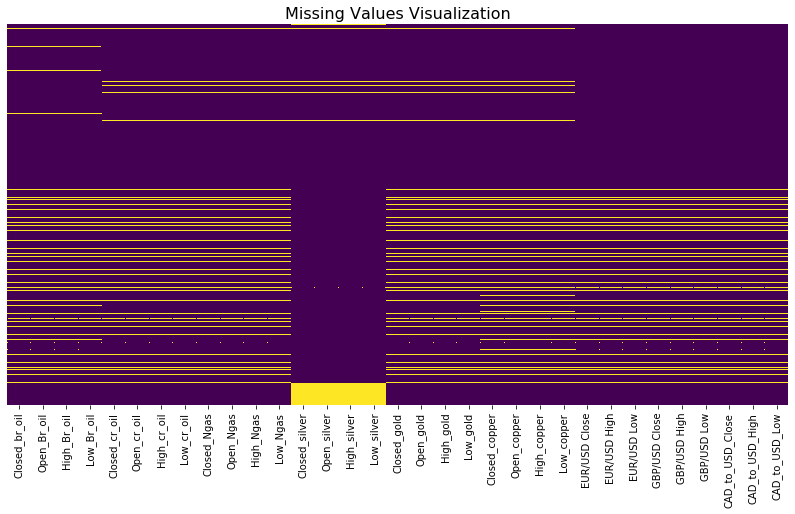

In [17]:
#visualize nan values
f,ax=plt.subplots(figsize=(14,7))
sbs.heatmap(all_merged.iloc[:,1:].isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)
ax.set_title('Missing Values Visualization',fontsize=16,color='black')
plt.show()

The above figure shows missing values with yellow colour. Yellow 'lines' are dated that prices are not traded . Furthermore,the yellow 'box' shows that silver has many nan values concentrated on last rows.

In [18]:
# check dataset info
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 34 columns):
Date                5438 non-null object
Closed_br_oil       4897 non-null float64
Open_Br_oil         4897 non-null float64
High_Br_oil         4897 non-null float64
Low_Br_oil          4897 non-null float64
Closed_cr_oil       4862 non-null float64
Open_cr_oil         4862 non-null float64
High_cr_oil         4862 non-null float64
Low_cr_oil          4862 non-null float64
Closed_Ngas         4861 non-null float64
Open_Ngas           4861 non-null float64
High_Ngas           4861 non-null float64
Low_Ngas            4861 non-null float64
Closed_silver       5000 non-null float64
Open_silver         5000 non-null float64
High_silver         5000 non-null float64
Low_silver          5000 non-null float64
Closed_gold         4866 non-null float64
Open_gold           4866 non-null float64
High_gold           4866 non-null float64
Low_gold            4866 non-null float64
Closed_coppe

In [19]:
#spot the row of silver nan values
all_merged['Low_silver'].tail(305)

5133    14.545
5134       NaN
5135       NaN
5136       NaN
5137       NaN
5138       NaN
5139       NaN
5140       NaN
5141       NaN
5142       NaN
5143       NaN
5144       NaN
5145       NaN
5146       NaN
5147       NaN
5148       NaN
5149       NaN
5150       NaN
5151       NaN
5152       NaN
5153       NaN
5154       NaN
5155       NaN
5156       NaN
5157       NaN
5158       NaN
5159       NaN
5160       NaN
5161       NaN
5162       NaN
         ...  
5408       NaN
5409       NaN
5410       NaN
5411       NaN
5412       NaN
5413       NaN
5414       NaN
5415       NaN
5416       NaN
5417       NaN
5418       NaN
5419       NaN
5420       NaN
5421       NaN
5422       NaN
5423       NaN
5424       NaN
5425       NaN
5426       NaN
5427       NaN
5428       NaN
5429       NaN
5430       NaN
5431       NaN
5432       NaN
5433       NaN
5434       NaN
5435       NaN
5436       NaN
5437       NaN
Name: Low_silver, Length: 305, dtype: float64

In [20]:
#The 304 missing values from silver will influence the analysis , that's why are dropped.
all_merged_drop = all_merged.drop(all_merged.index[5134:])
all_merged_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5133
Data columns (total 34 columns):
Date                5134 non-null object
Closed_br_oil       4600 non-null float64
Open_Br_oil         4600 non-null float64
High_Br_oil         4600 non-null float64
Low_Br_oil          4600 non-null float64
Closed_cr_oil       4559 non-null float64
Open_cr_oil         4559 non-null float64
High_cr_oil         4559 non-null float64
Low_cr_oil          4559 non-null float64
Closed_Ngas         4558 non-null float64
Open_Ngas           4558 non-null float64
High_Ngas           4558 non-null float64
Low_Ngas            4558 non-null float64
Closed_silver       5000 non-null float64
Open_silver         5000 non-null float64
High_silver         5000 non-null float64
Low_silver          5000 non-null float64
Closed_gold         4562 non-null float64
Open_gold           4562 non-null float64
High_gold           4562 non-null float64
Low_gold            4562 non-null float64
Closed_coppe

In [21]:
print(all_merged_drop.tail())

            Date  Closed_br_oil  Open_Br_oil  High_Br_oil  Low_Br_oil  \
5129  2018-08-31          77.42        77.53        77.79       77.00   
5130  2018-09-02            NaN          NaN          NaN         NaN   
5131  2018-09-03          78.15        77.69        78.44       77.30   
5132  2018-09-04          78.17        78.19        79.72       77.44   
5133  2018-09-05          77.27        77.82        78.09       76.91   

      Closed_cr_oil  Open_cr_oil  High_cr_oil  Low_cr_oil  Closed_Ngas  ...  \
5129          69.80        70.06        70.36       69.64        2.916  ...   
5130          69.92        69.91        69.99       69.88        2.897  ...   
5131          70.12        69.91        70.20       69.54        2.865  ...   
5132          69.87        69.89        71.40       69.08        2.823  ...   
5133          68.72        69.43        69.59       68.56        2.795  ...   

      Low_copper  EUR/USD Close  EUR/USD High  EUR/USD Low  GBP/USD Close  \
5129     

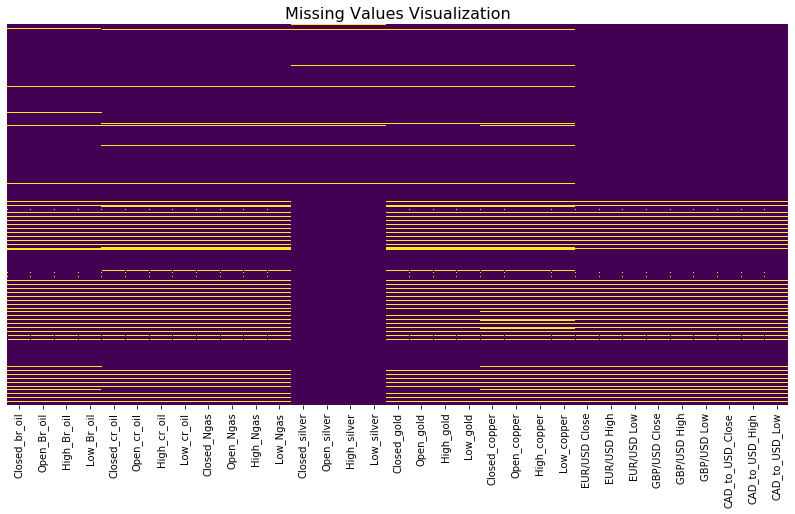

In [22]:
# visualisation of missing values
f,ax=plt.subplots(figsize=(14,7))
sbs.heatmap(all_merged_drop.iloc[:,1:].isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)
ax.set_title('Missing Values Visualization',fontsize=16,color='black')
plt.show()

In [23]:
#create new variable with only date column
all_merged_drop_date= all_merged_drop['Date']
#create new variable without DATE
all_merged_drop_sep = all_merged_drop.iloc[:, 1:]
all_merged_drop_sep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5133
Data columns (total 33 columns):
Closed_br_oil       4600 non-null float64
Open_Br_oil         4600 non-null float64
High_Br_oil         4600 non-null float64
Low_Br_oil          4600 non-null float64
Closed_cr_oil       4559 non-null float64
Open_cr_oil         4559 non-null float64
High_cr_oil         4559 non-null float64
Low_cr_oil          4559 non-null float64
Closed_Ngas         4558 non-null float64
Open_Ngas           4558 non-null float64
High_Ngas           4558 non-null float64
Low_Ngas            4558 non-null float64
Closed_silver       5000 non-null float64
Open_silver         5000 non-null float64
High_silver         5000 non-null float64
Low_silver          5000 non-null float64
Closed_gold         4562 non-null float64
Open_gold           4562 non-null float64
High_gold           4562 non-null float64
Low_gold            4562 non-null float64
Closed_copper       4509 non-null float64
Open_copper

In [24]:
# fill nan values
all_merged_drop_sep_fillna = all_merged_drop_sep.fillna(method = 'bfill', axis = 0)
print(all_merged_drop_sep_fillna.shape[0] - all_merged_drop_sep_fillna.count())

Closed_br_oil       0
Open_Br_oil         0
High_Br_oil         0
Low_Br_oil          0
Closed_cr_oil       0
Open_cr_oil         0
High_cr_oil         0
Low_cr_oil          0
Closed_Ngas         0
Open_Ngas           0
High_Ngas           0
Low_Ngas            0
Closed_silver       0
Open_silver         0
High_silver         0
Low_silver          0
Closed_gold         0
Open_gold           0
High_gold           0
Low_gold            0
Closed_copper       0
Open_copper         0
High_copper         0
Low_copper          0
EUR/USD Close       0
EUR/USD High        0
EUR/USD Low         0
GBP/USD Close       0
GBP/USD High        0
GBP/USD Low         0
CAD_to_USD_Close    0
CAD_to_USD_High     0
CAD_to_USD_Low      0
dtype: int64


In [25]:
print(all_merged_drop_sep_fillna)

      Closed_br_oil  Open_Br_oil  High_Br_oil  Low_Br_oil  Closed_cr_oil  \
0             31.08        30.20        31.27       30.10          32.18   
1             31.05        31.00        31.19       30.70          32.07   
2             30.52        30.75        30.75       30.35          31.43   
3             29.89        29.90        29.95       29.42          30.53   
4             30.10        30.10        30.22       29.85          30.86   
5             30.76        30.70        30.96       30.24          31.86   
6             31.85        31.10        31.90       31.00          33.18   
7             31.79        32.65        32.65       31.50          33.25   
8             34.59        31.58        35.30       31.55          36.06   
9             32.52        34.85        35.07       32.50          34.99   
10            31.90        31.95        32.97       31.85          32.92   
11            31.13        31.45        31.58       30.56          32.99   
12          

In [26]:
#check for non-null
all_merged_drop_sep_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5133
Data columns (total 33 columns):
Closed_br_oil       5134 non-null float64
Open_Br_oil         5134 non-null float64
High_Br_oil         5134 non-null float64
Low_Br_oil          5134 non-null float64
Closed_cr_oil       5134 non-null float64
Open_cr_oil         5134 non-null float64
High_cr_oil         5134 non-null float64
Low_cr_oil          5134 non-null float64
Closed_Ngas         5134 non-null float64
Open_Ngas           5134 non-null float64
High_Ngas           5134 non-null float64
Low_Ngas            5134 non-null float64
Closed_silver       5134 non-null float64
Open_silver         5134 non-null float64
High_silver         5134 non-null float64
Low_silver          5134 non-null float64
Closed_gold         5134 non-null float64
Open_gold           5134 non-null float64
High_gold           5134 non-null float64
Low_gold            5134 non-null float64
Closed_copper       5134 non-null float64
Open_copper

# Create new  variables

In [27]:
all_merged_drop_sep_fillna['br_oil_mean'] = all_merged_drop_sep_fillna.apply(lambda row: ((row.Closed_br_oil  + row.High_Br_oil+ row.Low_Br_oil)/ 3), axis = 1)

all_merged_drop_sep_fillna['cr_oil_mean'] = all_merged_drop_sep_fillna.apply(lambda row: (row.Closed_cr_oil  + row.High_cr_oil+ row.Low_cr_oil)/
                                   (3), axis = 1)
all_merged_drop_sep_fillna['Ngas_mean'] = all_merged_drop_sep_fillna.apply(lambda row : (row.Closed_Ngas  + row.High_Ngas+ row.Low_Ngas)/
                                   (3), axis = 1) 
all_merged_drop_sep_fillna['silver_mean'] = all_merged_drop_sep_fillna.apply( lambda row : (row.Closed_silver + row.High_silver+ row.Low_silver)/
                                   (3), axis = 1) 
all_merged_drop_sep_fillna['gold_mean'] = all_merged_drop_sep_fillna.apply (lambda row : (row.Closed_gold + row.High_gold+ row.Low_gold)/
                                   (3), axis = 1) 
all_merged_drop_sep_fillna['copper_mean'] = all_merged_drop_sep_fillna.apply (lambda row : (row.Closed_copper + row.High_copper+ row.Low_copper)/
                                   (3), axis = 1)


In [28]:
#rename variables names
all_merged_drop_sep_fillna = all_merged_drop_sep_fillna.rename(columns = {'EUR/USD Close':'EUR_to_USD_Close',
                                       'EUR/USD High':'EUR_to_USD_High',
                                       'EUR/USD Low' :'EUR_to_USD_Low',
                                        'GBP/USD Close' : 'GBP_to_USD_Close',
                                        'GBP/USD High' : 'GBP_to_USD_High',
                                        'GBP/USD Low'  : 'GBP_to_USD_Low' ,             
                                                           })

In [29]:
all_merged_drop_sep_fillna['EUR_to_USD_mean'] = all_merged_drop_sep_fillna.apply (lambda row : (row.EUR_to_USD_Close + row.EUR_to_USD_High + row.EUR_to_USD_Low)/
                                   (3), axis = 1)

all_merged_drop_sep_fillna['GBP_to_USD_mean'] = all_merged_drop_sep_fillna.apply (lambda row : (row.GBP_to_USD_Close + row.GBP_to_USD_High + row.GBP_to_USD_Low)/
                                   (3), axis = 1)
all_merged_drop_sep_fillna['CAD_to_USD_mean'] = all_merged_drop_sep_fillna.apply (lambda row : (row.CAD_to_USD_Close + row.CAD_to_USD_High + row.CAD_to_USD_Low)/
                                   (3), axis = 1)

In [30]:
#check information
all_merged_drop_sep_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5133
Data columns (total 42 columns):
Closed_br_oil       5134 non-null float64
Open_Br_oil         5134 non-null float64
High_Br_oil         5134 non-null float64
Low_Br_oil          5134 non-null float64
Closed_cr_oil       5134 non-null float64
Open_cr_oil         5134 non-null float64
High_cr_oil         5134 non-null float64
Low_cr_oil          5134 non-null float64
Closed_Ngas         5134 non-null float64
Open_Ngas           5134 non-null float64
High_Ngas           5134 non-null float64
Low_Ngas            5134 non-null float64
Closed_silver       5134 non-null float64
Open_silver         5134 non-null float64
High_silver         5134 non-null float64
Low_silver          5134 non-null float64
Closed_gold         5134 non-null float64
Open_gold           5134 non-null float64
High_gold           5134 non-null float64
Low_gold            5134 non-null float64
Closed_copper       5134 non-null float64
Open_copper

In [31]:
#select only new variables
df = all_merged_drop_sep_fillna.iloc[:, 33:]
df1 = df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5134 entries, 0 to 5133
Data columns (total 9 columns):
br_oil_mean        5134 non-null float64
cr_oil_mean        5134 non-null float64
Ngas_mean          5134 non-null float64
silver_mean        5134 non-null float64
gold_mean          5134 non-null float64
copper_mean        5134 non-null float64
EUR_to_USD_mean    5134 non-null float64
GBP_to_USD_mean    5134 non-null float64
CAD_to_USD_mean    5134 non-null float64
dtypes: float64(9)
memory usage: 401.1 KB


In [32]:
# Generate descriptive statistics
df.describe()

,br_oil_mean,cr_oil_mean,Ngas_mean,silver_mean,gold_mean,copper_mean,EUR_to_USD_mean,GBP_to_USD_mean,CAD_to_USD_mean
count,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000,5134.000000
mean,67.870840,64.421386,4.690287,15.870960,991.015347,2.529154,1.229078,1.602433,0.846305
std,30.615500,26.591998,2.234391,8.855067,471.806701,1.068600,0.160962,0.196744,0.120513
min,17.570000,17.573333,1.650667,4.026000,255.366667,0.606000,0.827967,1.204237,0.619634
25%,44.776667,43.972500,2.986000,7.574583,450.158333,1.569250,1.123380,1.462875,0.758333
50%,63.450000,61.570000,4.041000,16.001333,1142.833333,2.837833,1.252883,1.580333,0.842641
75%,97.283333,88.197500,5.853833,19.338583,1370.400000,3.343250,1.342375,1.713333,0.963067
max,145.650000,144.786667,15.336333,48.438000,1881.833333,4.614333,1.595067,2.105833,1.085419


In [33]:
#check skewness
df.skew()

br_oil_mean        0.261772
cr_oil_mean        0.240763
Ngas_mean          1.519966
silver_mean        0.758777
gold_mean         -0.200673
copper_mean       -0.423310
EUR_to_USD_mean   -0.456241
GBP_to_USD_mean    0.376809
CAD_to_USD_mean   -0.150230
dtype: float64

# Exploratory data analysis

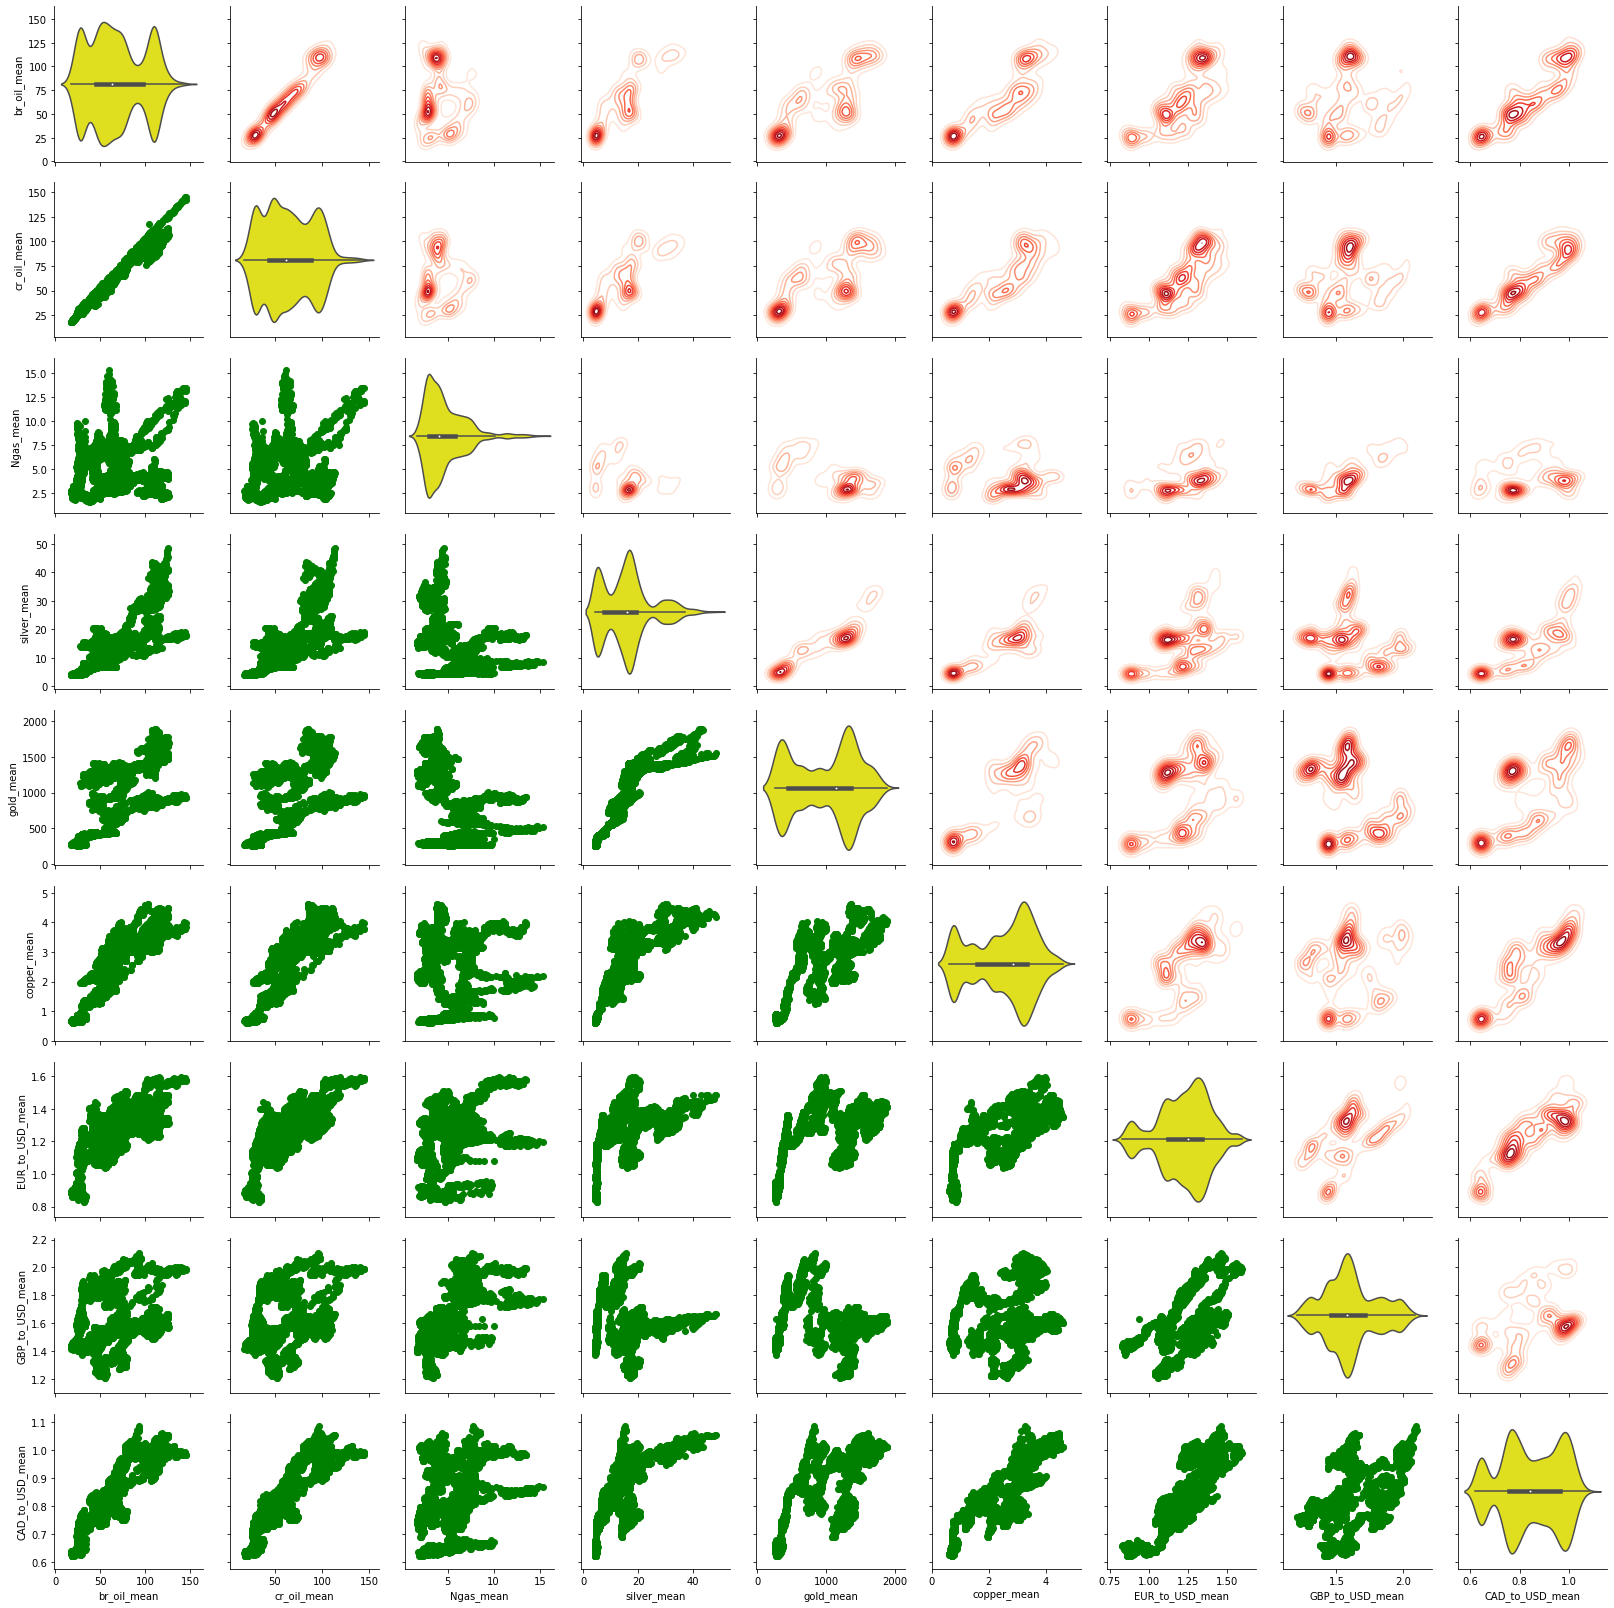

In [34]:
g = sbs.PairGrid(df )
g.map_diag(sbs.violinplot , color = 'Yellow')
g.map_lower(plt.scatter , color = 'green')
g.map_upper(sbs.kdeplot , cmap = 'Reds')

A pair grid is created in order to illustrate a general view of the dataset. First of all, at low part of the map we detected that many variables are higly correlated.Secondly , on the diagonal are violin plots which shows the distribution, the density probability , the median value and the interquartile range of each variable. Also, it shows that most of the variables are biomodal and Ngas_mean, Silver_mean are highly skewed. Furthermore, it is easily observed that we have outliers and they will need elaboration.  Finally, the upper part of the map is Kernel density estimation  plot which is used for visualizing the Probability Density of 2 continuous variable. The peaks of a Density Plot help display where values are concentrated over the interval.

In [35]:
# add date
df['Date'] = all_merged_drop_date
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df = df.set_index('Date')

In [ ]:
#statistical causility

# Autocorrelation and Partial Autocorrelation

-The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

-The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.


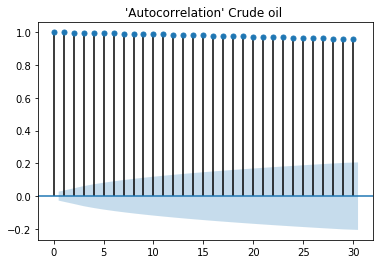

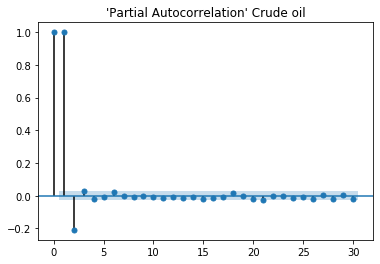

In [36]:

# Autocorrelation 
plot_acf(df["cr_oil_mean"],lags=30,title="'Autocorrelation' Crude oil ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(df["cr_oil_mean"],lags=30, title="'Partial Autocorrelation' Crude oil")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

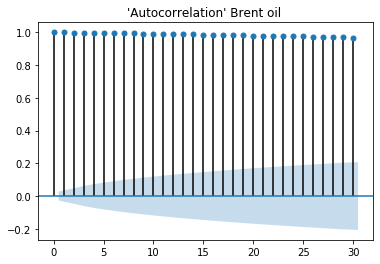

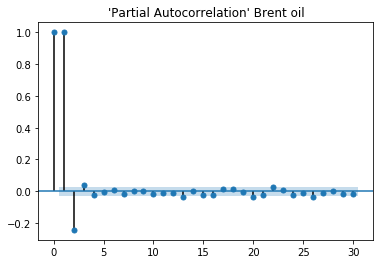

In [37]:
# Autocorrelation 
plot_acf(df["br_oil_mean"],lags=30,title="'Autocorrelation' Brent oil ")
plt.show()

# Partial Autocorrelation
plot_pacf(df["br_oil_mean"],lags=30, title="'Partial Autocorrelation' Brent oil")
plt.show()

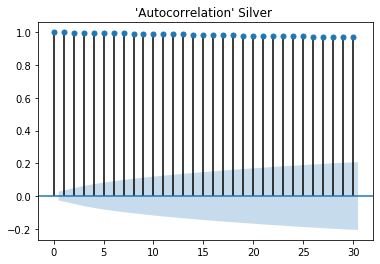

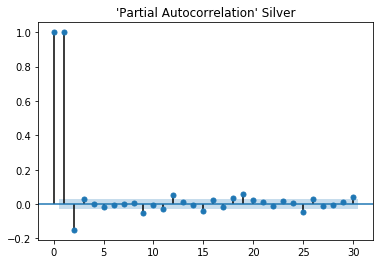

In [38]:
# Autocorrelation 
plot_acf(df["silver_mean"],lags=30,title="'Autocorrelation' Silver ")
plt.show()

# Partial Autocorrelation
plot_pacf(df["silver_mean"],lags=30, title="'Partial Autocorrelation' Silver")
plt.show()

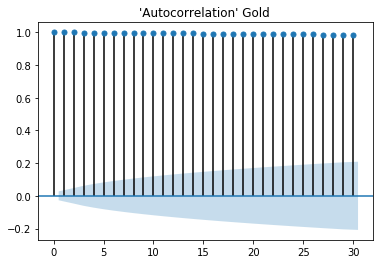

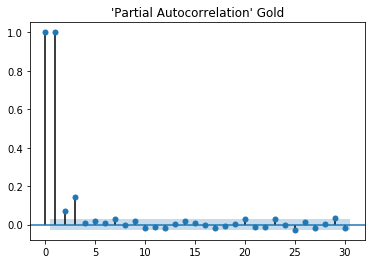

In [39]:
# Autocorrelation 
plot_acf(df["gold_mean"],lags=30,title="'Autocorrelation' Gold ")
plt.show()

# Partial Autocorrelation
plot_pacf(df["gold_mean"],lags=30, title="'Partial Autocorrelation' Gold")
plt.show()

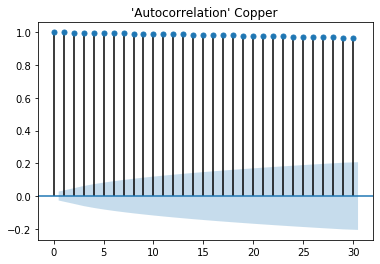

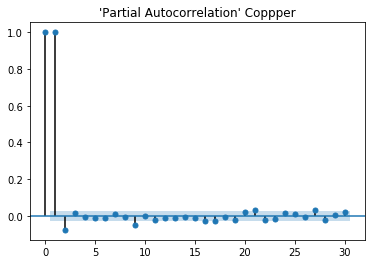

In [40]:
# Autocorrelation 
plot_acf(df["copper_mean"],lags=30,title="'Autocorrelation' Copper ")
plt.show()

# Partial Autocorrelation
plot_pacf(df["copper_mean"],lags=30, title="'Partial Autocorrelation' Coppper")
plt.show()

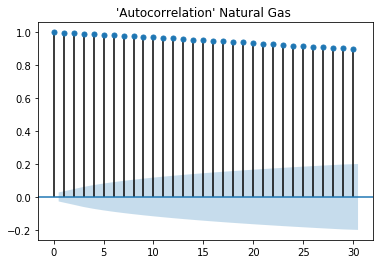

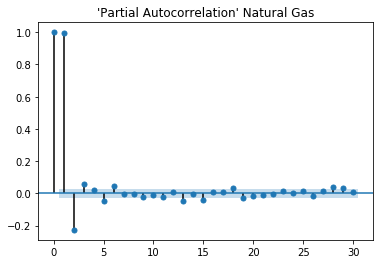

In [41]:
# Autocorrelation 
plot_acf(df["Ngas_mean"],lags=30,title="'Autocorrelation' Natural Gas ")
plt.show()

# Partial Autocorrelation
plot_pacf(df["Ngas_mean"],lags=30, title="'Partial Autocorrelation' Natural Gas")
plt.show()

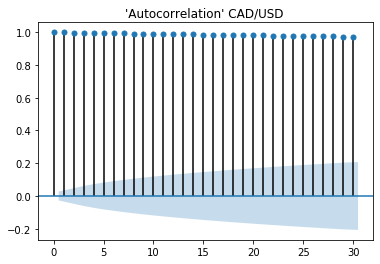

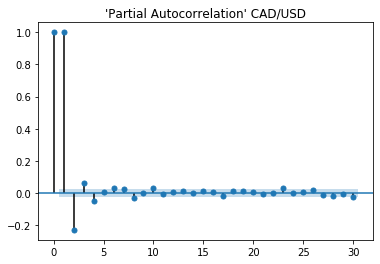

In [42]:
# Autocorrelation 
plot_acf(df['CAD_to_USD_mean'],lags=30,title="'Autocorrelation' CAD/USD ")
plt.show()

# Partial Autocorrelation
plot_pacf(df['CAD_to_USD_mean'],lags=30, title="'Partial Autocorrelation' CAD/USD")
plt.show()

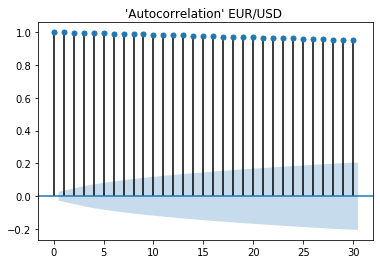

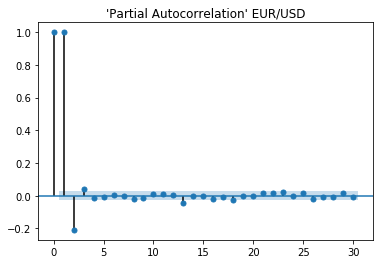

In [43]:
# Autocorrelation 
plot_acf(df['EUR_to_USD_mean'],lags=30,title="'Autocorrelation' EUR/USD ")
plt.show()

# Partial Autocorrelation
plot_pacf(df['EUR_to_USD_mean'],lags=30, title="'Partial Autocorrelation' EUR/USD")
plt.show()

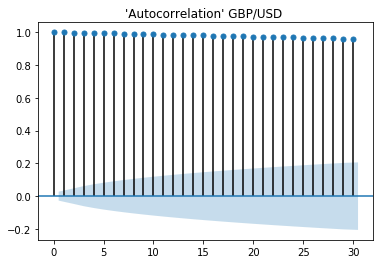

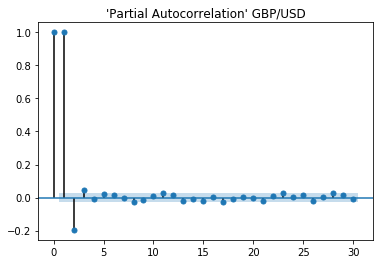

In [44]:
# Autocorrelation 
plot_acf(df['GBP_to_USD_mean'],lags=30,title="'Autocorrelation' GBP/USD ")
plt.show()

# Partial Autocorrelation
plot_pacf(df['GBP_to_USD_mean'],lags=30, title="'Partial Autocorrelation' GBP/USD")
plt.show()

# Time series decomposition

a) Trend : Consistent upwards or downwards slope of a time series

b) Seasonality : Clear periodic pattern of a time series

c) Noise : Outliers or missing values

d) Residuals : Shows if a linear regression model is approriate the data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5134 entries, 2000-10-02 to 2018-09-05
Data columns (total 9 columns):
br_oil_mean        5134 non-null float64
cr_oil_mean        5134 non-null float64
Ngas_mean          5134 non-null float64
silver_mean        5134 non-null float64
gold_mean          5134 non-null float64
copper_mean        5134 non-null float64
EUR_to_USD_mean    5134 non-null float64
GBP_to_USD_mean    5134 non-null float64
CAD_to_USD_mean    5134 non-null float64
dtypes: float64(9)
memory usage: 401.1 KB


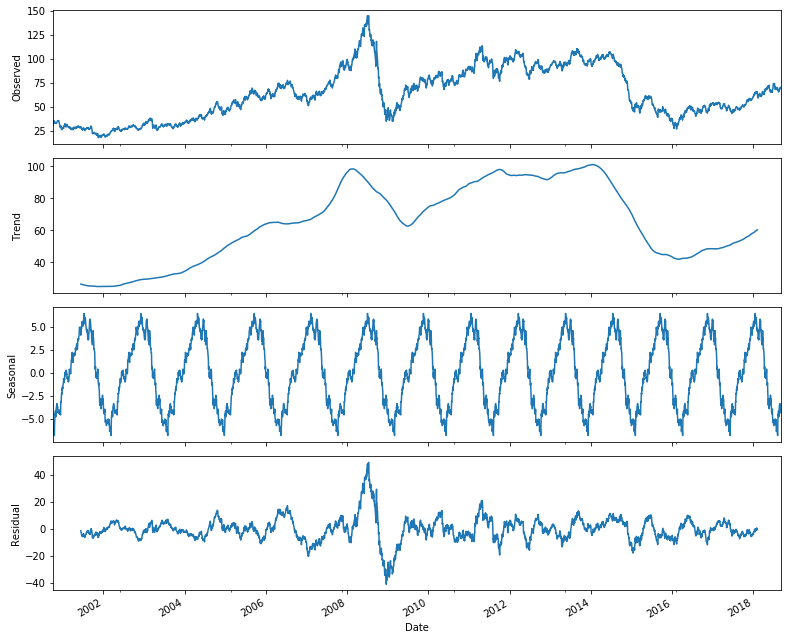

In [46]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_cr_oil = sm.tsa.seasonal_decompose( df['cr_oil_mean'] , freq = 364 )
figure = decomposed_cr_oil.plot()
plt.show()

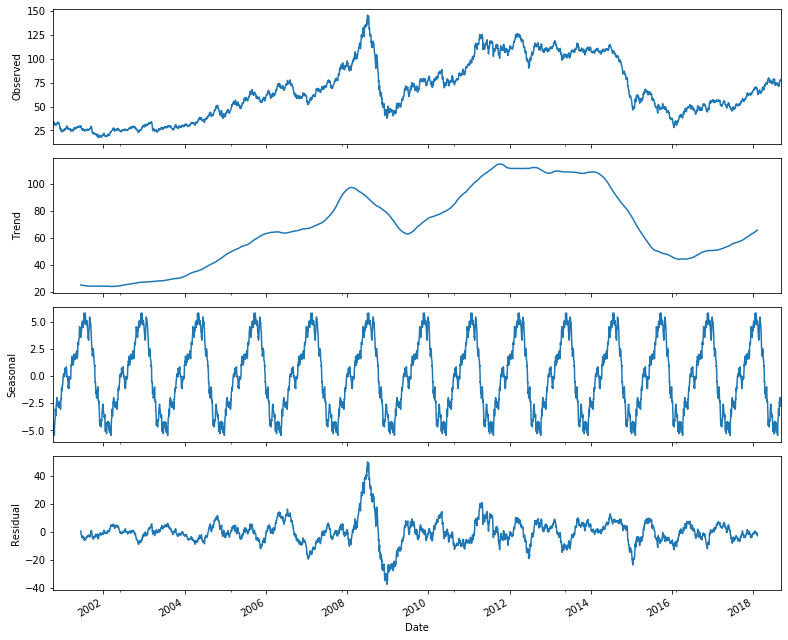

In [47]:
rcParams['figure.figsize'] = 11, 9
decomposed_br_oil = sm.tsa.seasonal_decompose(df['br_oil_mean'] , freq = 364 )
figure = decomposed_br_oil.plot()
plt.show()

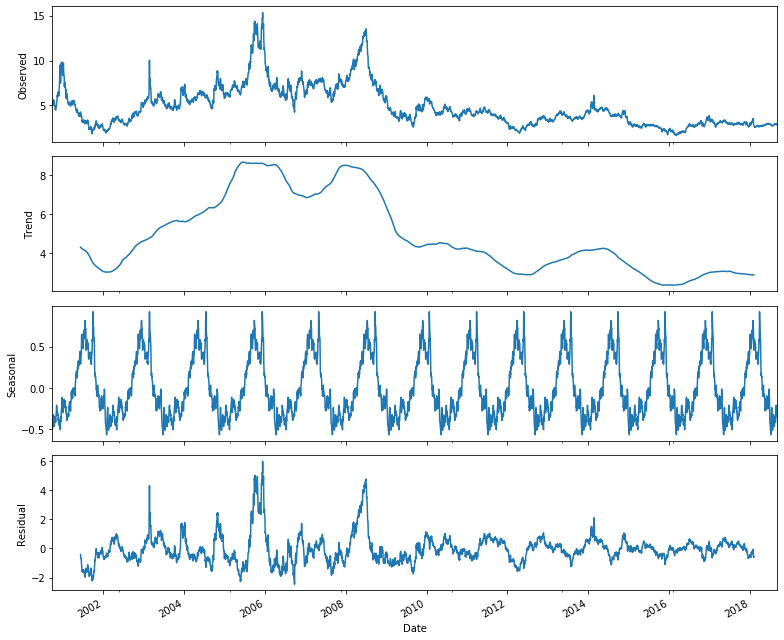

In [48]:
rcParams['figure.figsize'] = 11, 9
decomposed_Ngas = sm.tsa.seasonal_decompose(df['Ngas_mean'] , freq = 364 ) 
figure = decomposed_Ngas.plot()
plt.show()

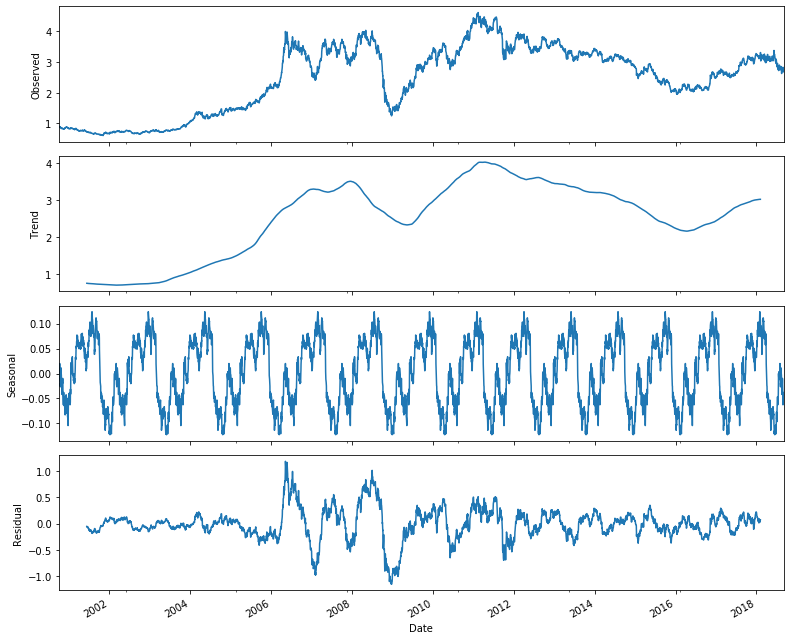

In [49]:
rcParams['figure.figsize'] = 11, 9
decomposed_copper = sm.tsa.seasonal_decompose(df['copper_mean'] , freq = 364 ) 
figure = decomposed_copper.plot()
plt.show()

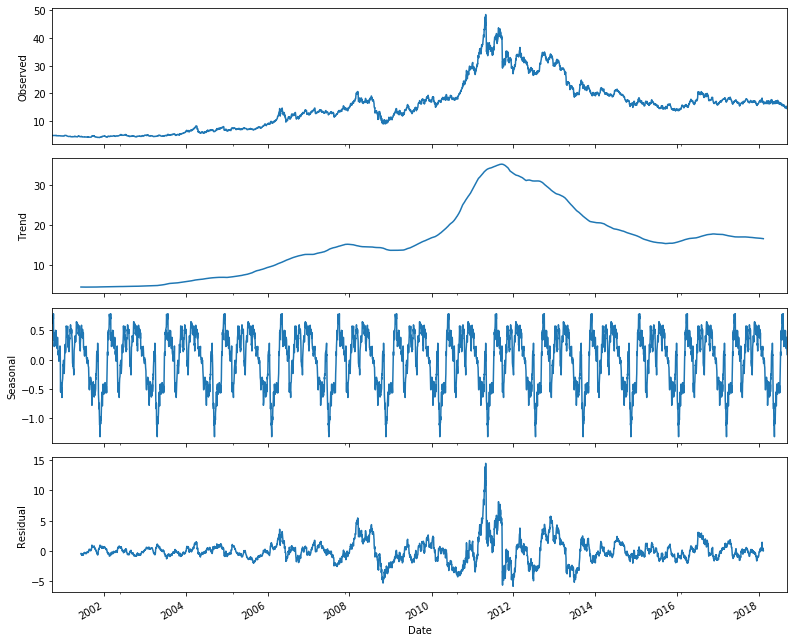

In [50]:
rcParams['figure.figsize'] = 11, 9
decomposed_silver = sm.tsa.seasonal_decompose(df['silver_mean'] , freq = 364 ) 
figure = decomposed_silver.plot()
plt.show()

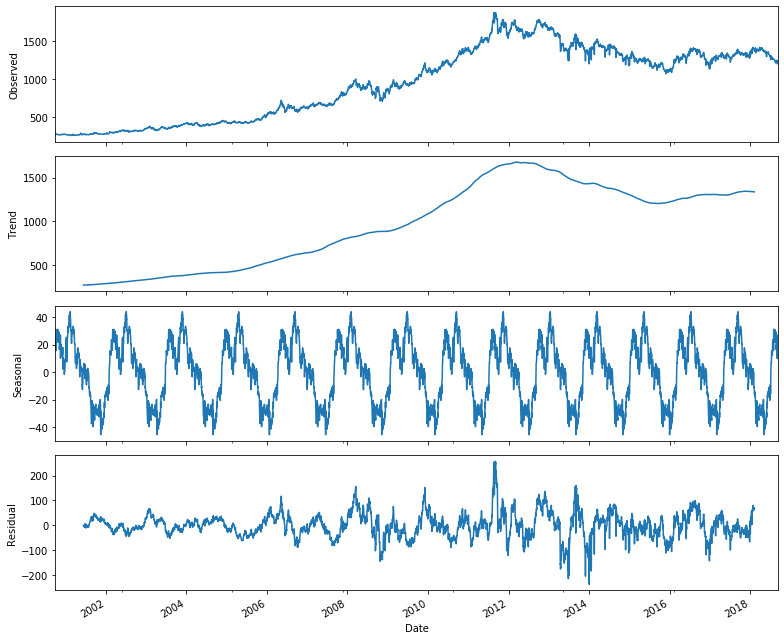

In [51]:
rcParams['figure.figsize'] = 11, 9
decomposed_gold = sm.tsa.seasonal_decompose(df['gold_mean'] , freq = 364 ) 
figure = decomposed_gold.plot()
plt.show()

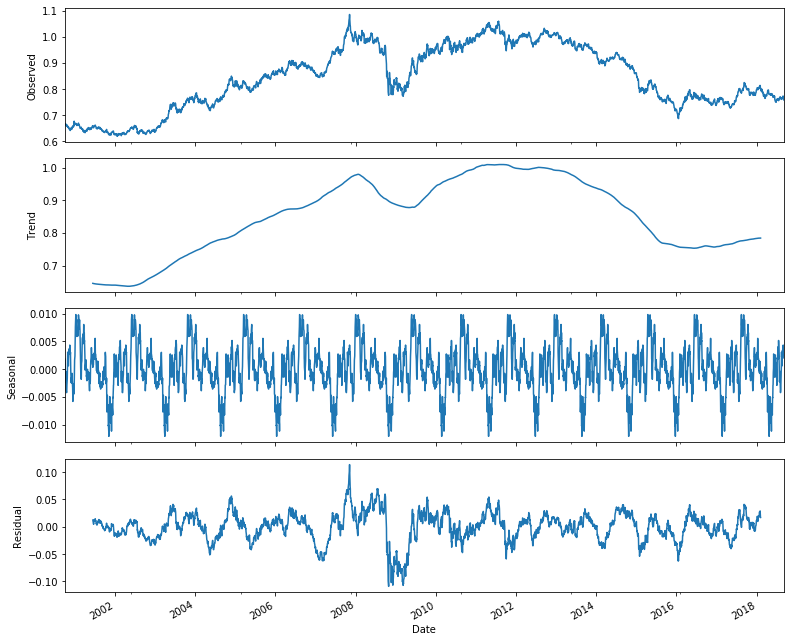

In [52]:
rcParams['figure.figsize'] = 11, 9
decomposed_CAD = sm.tsa.seasonal_decompose(df['CAD_to_USD_mean'] , freq = 364 ) 
figure = decomposed_CAD.plot()
plt.show()

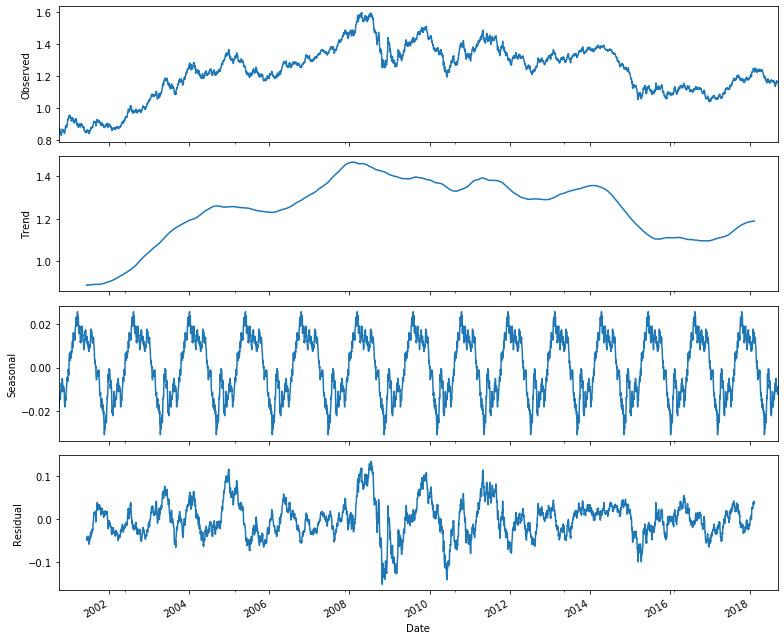

In [53]:
rcParams['figure.figsize'] = 11, 9
decomposed_EUR = sm.tsa.seasonal_decompose(df['EUR_to_USD_mean'] , freq = 364 ) 
figure = decomposed_EUR.plot()
plt.show()

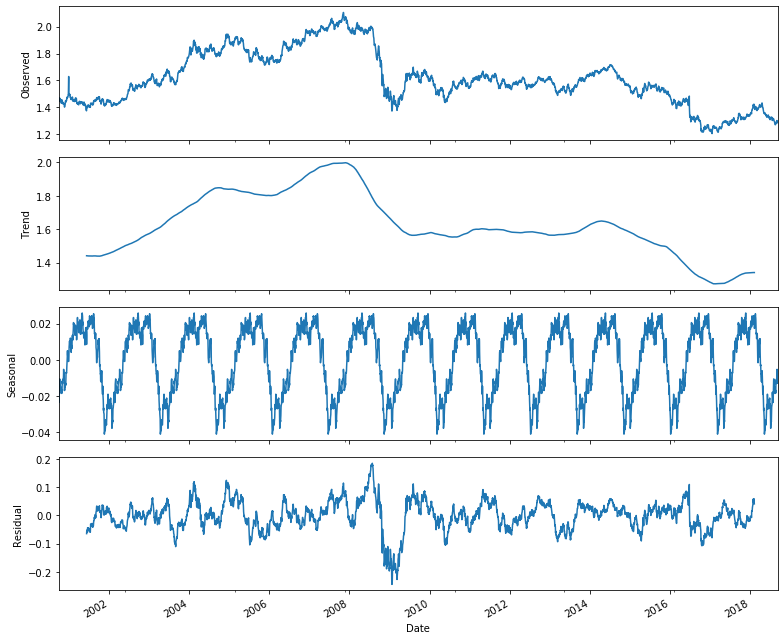

In [54]:
rcParams['figure.figsize'] = 11, 9
decomposed_GBP = sm.tsa.seasonal_decompose(df['GBP_to_USD_mean'] , freq = 364 ) 
figure = decomposed_GBP.plot()
plt.show()

In [1]:


trace1 = go.Scatter(
    x = df1['Date'],
    y = df1['cr_oil_mean'],
    mode = 'lines',
    name = 'Crude oil')

trace2 = go.Scatter(
    x = df1['Date'],
    y = df1['br_oil_mean'],
    mode = 'lines',
    name = 'Brent oil')

trace3 = go.Scatter(
    x = df1['Date'],
    y = df1['Ngas_mean'],
    mode = 'lines',
    name = 'Natural Gas')

trace4 = go.Scatter(
    x = df1['Date'],
    y = df1['copper_mean']*50,
    mode = 'lines',
    name = 'Copper')

trace5 = go.Scatter(
    x = df1['Date'],
    y = df1['gold_mean'],
    mode = 'lines',
    name = 'Gold')

trace6 = go.Scatter(
    x = df1['Date'],
    y = df1['silver_mean']*10,
    mode = 'lines',
    name = 'Silver')

trace7 = go.Scatter(
    x = df1['Date'],
    y = df1['CAD_to_USD_mean']*100,
    mode = 'lines',
    name = 'CAD')

trace8 = go.Scatter(
    x = df1['Date'],
    y = df1['EUR_to_USD_mean']*100,
    mode = 'lines',
    name = 'EUR')

trace9 = go.Scatter(
    x = df1['Date'],
    y = df1['GBP_to_USD_mean']*50,
    mode = 'lines',
    name = 'GBP')
data = [trace1, trace2, trace3, trace4,trace5, trace6, trace7, trace8, trace9]

layout = go.Layout(title = ' Comparisons '
    , barmode = 'group'
    , yaxis=dict(title='Price(USD)')
    , xaxis=dict(title='Year')
    , legend=dict(x=1,y=1)
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

NameError: name 'go' is not defined

# Machine Learning Model

In order to forecast the currensies price , i will use a multivariate time series algorithm the Vector Autoregression (VAR) which is used when more than two time series influence each other. Also, i follow the instructions from this article. https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [56]:
#Check if df1 satisfy the requirments of VAR.
df.dtypes

br_oil_mean        float64
cr_oil_mean        float64
Ngas_mean          float64
silver_mean        float64
gold_mean          float64
copper_mean        float64
EUR_to_USD_mean    float64
GBP_to_USD_mean    float64
CAD_to_USD_mean    float64
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5134 entries, 2000-10-02 to 2018-09-05
Data columns (total 9 columns):
br_oil_mean        5134 non-null float64
cr_oil_mean        5134 non-null float64
Ngas_mean          5134 non-null float64
silver_mean        5134 non-null float64
gold_mean          5134 non-null float64
copper_mean        5134 non-null float64
EUR_to_USD_mean    5134 non-null float64
GBP_to_USD_mean    5134 non-null float64
CAD_to_USD_mean    5134 non-null float64
dtypes: float64(9)
memory usage: 401.1 KB


In [58]:
# Import statistical libraries
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


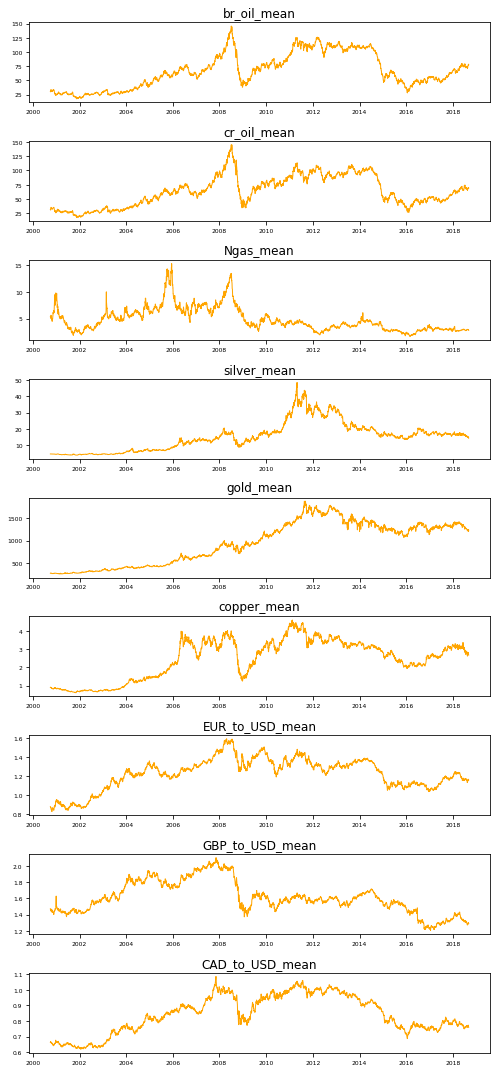

In [79]:
# visualize trends of variables
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(7,15))

for i, ax in enumerate(axes.flatten()):
    Time_series = df[df.columns[i]]
    ax.plot(Time_series, color='orange', linewidth=1)
    ax.set_title(df.columns[i])
    ax.tick_params(labelsize=6)

plt.tight_layout();

All variables had a significant upward trend from 2000 until 2008. While 2008 most of them) had a momentus plunged, although  silver and gold prices had a slightly drop.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5134 entries, 2000-10-02 to 2018-09-05
Data columns (total 9 columns):
br_oil_mean        5134 non-null float64
cr_oil_mean        5134 non-null float64
Ngas_mean          5134 non-null float64
silver_mean        5134 non-null float64
gold_mean          5134 non-null float64
copper_mean        5134 non-null float64
EUR_to_USD_mean    5134 non-null float64
GBP_to_USD_mean    5134 non-null float64
CAD_to_USD_mean    5134 non-null float64
dtypes: float64(9)
memory usage: 401.1 KB


This table shows if X which is column  casues Y which is rows when p-value < 0.05(significance level) . Euro has high causing response with Natural gas, gold and CAD. However, GBP  only silver rejected cause of the higher rate of significance level. Also , CAD has causing level with brent and crude  oil and gold.

In [62]:
##split data
next_days = 7 #forecast next 3 observations
df_train, df_test = df[0:-next_days], df[-next_days:]

# Check size
print(df_train.shape)  
print(df_test.shape)

(5127, 9)
(7, 9)


In [63]:
# check stationarity with Augmented Dickey-Fuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')# a method for automatically determining the lag
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[4]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # print results
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Lvl    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif: # define hypothesis
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [64]:
# ADF-Test for all columns
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "br_oil_mean" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lvl    = 0.05
 Test Statistic        = -1.6537
 No. Lags Chosen       = 2
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.4551. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "cr_oil_mean" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lvl    = 0.05
 Test Statistic        = -1.905
 No. Lags Chosen       = 2
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.3297. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Ngas_mean" 
    -----------------------------------------------
 Null Hypothesis: Da

All time series are not stationary.So, i will difference them and check again.

In [65]:
# forced difference
df_differenced = df_train.diff().dropna()

In [66]:
#adf-test
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "br_oil_mean" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lvl    = 0.05
 Test Statistic        = -46.1598
 No. Lags Chosen       = 1
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "cr_oil_mean" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lvl    = 0.05
 Test Statistic        = -46.7396
 No. Lags Chosen       = 1
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Ngas_mean" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

All time seriess are sationary.

In [67]:
#select optimum order(P) for our model.
model = VAR(df_differenced)
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,-41.28,-41.27,1.178e-18,-41.28
1,-41.61,-41.49*,8.534e-19,-41.56
2,-41.66,-41.44,8.057e-19,-41.59*
3,-41.66*,-41.34,8.051e-19*,-41.55
4,-41.66,-41.23,8.086e-19,-41.51
5,-41.65,-41.12,8.159e-19,-41.46
6,-41.64,-41.01,8.213e-19,-41.42
7,-41.63,-40.90,8.298e-19,-41.38
8,-41.62,-40.78,8.396e-19,-41.33
9,-41.61,-40.67,8.504e-19,-41.28


From the output , 10 lag is chosen because it has the lowest value for FPE and HQIC.

In [68]:
#train model
model_fitted = model.fit(10)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Dec, 2019
Time:                     21:58:37
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -40.5547
Nobs:                     5116.00    HQIC:                  -41.2351
Log likelihood:           41902.4    FPE:                8.56349e-19
AIC:                     -41.6016    Det(Omega_mle):     7.30697e-19
--------------------------------------------------------------------
Results for equation br_oil_mean
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.007193         0.013417            0.536           0.592
L1.br_oil_mean              0.108968         0.025644            4.249           0.000
L1.cr_oil_mean              0.

Neighboring residuals must not be correlated. If they are correlated, one residual can predict the next residual. That is known as autocorrelation. This correlation represents explanatory information that the independent variables do not describe. This explanation given by Meet jim.
https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/

In [69]:
# Durbin Watson Statistic used to check for hidden pattern between the residuals error 
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

br_oil_mean : 2.0
cr_oil_mean : 2.0
Ngas_mean : 2.0
silver_mean : 2.0
gold_mean : 2.0
copper_mean : 2.0
EUR_to_USD_mean : 2.0
GBP_to_USD_mean : 2.0
CAD_to_USD_mean : 2.0


The above results explaine that there is no significant serial correlation. This is a very good result beacause it assures that our model is capable to explain the variances and patterns to the time series.

In [70]:
#forecast
# call the lag order
lag_10 = model_fitted.k_ar
print(lag_10)  # 10

# load data for forecasting
forecast_load = df_differenced.values[-lag_10:]
forecast_load

10


array([[ 7.40000000e-01,  7.30000000e-01,  2.46666667e-02,
        -6.83333333e-02,  2.90000000e+00,  1.14666667e-01,
         5.73333333e-03,  1.23333333e-03,  3.24315552e-03],
       [ 2.70000000e-01,  3.66666667e-01, -8.00000000e-03,
        -1.41000000e-01,  9.63333333e+00,  1.63333333e-02,
         2.73333333e-03,  3.73333333e-03,  1.66494200e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.97333333e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.16666667e-01,  1.09000000e+00,  4.20000000e-02,
         7.43333333e-02,  5.10000000e+00,  2.60000000e-02,
         1.07666667e-02,  8.46666667e-03,  1.50640315e-03],
       [ 1.61666667e+00,  6.66666667e-03, -7.33333333e-03,
        -1.03333333e-02,  3.66666667e+00, -7.00000000e-03,
         3.73333333e-03,  5.10000000e-03,  8.23968796e-04],
       [ 4.43333333e-01,  4.26666667e-01, -7.00000000e-03,
        -1.90333333e-01, -8.33333333e+00, -2.700000

In [71]:
# Forecast
forecast_mdl = model_fitted.forecast(y=forecast_load, steps=next_days)
df_forecast_mdl = pd.DataFrame(forecast_mdl, index=df.index[-next_days:], columns=df.columns + '_diff')
df_forecast_mdl

,br_oil_mean_diff,cr_oil_mean_diff,Ngas_mean_diff,silver_mean_diff,gold_mean_diff,copper_mean_diff,EUR_to_USD_mean_diff,GBP_to_USD_mean_diff,CAD_to_USD_mean_diff
Date,,,,,,,,,
2018-08-29,0.213591,0.215134,-0.011621,0.108460,6.113457,0.016158,0.002679,0.002363,0.002038
2018-08-30,0.013679,0.092680,-0.004757,-0.036598,0.906725,0.000399,0.000276,0.000550,0.000011
2018-08-31,-0.015806,-0.067905,-0.015175,0.019809,-1.682978,0.002789,-0.000626,0.000279,0.000187
2018-09-02,-0.012504,-0.059344,0.001728,0.016707,0.233729,-0.001196,-0.000492,-0.001091,-0.000008
2018-09-03,0.001628,0.046926,-0.000809,0.007291,-0.173988,0.003012,-0.000081,0.000223,0.000258
2018-09-04,-0.035019,-0.032065,-0.006298,-0.001494,0.681140,-0.000259,0.000281,0.000408,-0.000021
2018-09-05,0.022901,0.001361,-0.004509,0.030242,0.715808,0.001050,0.000470,0.000551,0.000037


This forecast is from diffrenced training data.

In [72]:
# show results
df_train

,br_oil_mean,cr_oil_mean,Ngas_mean,silver_mean,gold_mean,copper_mean,EUR_to_USD_mean,GBP_to_USD_mean,CAD_to_USD_mean
Date,,,,,,,,,
2000-10-02,30.816667,31.820000,5.325667,4.762667,273.033333,0.901667,0.880633,1.471167,0.663399
2000-10-03,30.980000,32.023333,5.336000,4.762667,271.966667,0.894667,0.875200,1.460533,0.664042
2000-10-04,30.540000,31.670000,5.260000,4.762667,270.466667,0.894333,0.874733,1.457700,0.667177
2000-10-05,29.753333,30.640000,5.179000,4.762667,270.300000,0.909333,0.871867,1.450467,0.668153
2000-10-06,30.056667,30.813333,5.049000,4.762667,269.766667,0.904333,0.869533,1.445833,0.666838
2000-10-09,30.653333,31.540000,5.103333,4.762667,269.433333,0.891000,0.868667,1.447333,0.665632
2000-10-10,31.583333,32.746667,5.138000,4.762667,272.400000,0.900667,0.870633,1.452667,0.666327
2000-10-11,31.980000,33.403333,5.382667,4.762667,271.666667,0.896667,0.871100,1.460433,0.665441
2000-10-12,33.813333,35.306667,5.628333,4.762667,275.133333,0.880333,0.863933,1.468100,0.662825


In [73]:
# convert the results in order to get the real forecast
def invert_transformation(df_train, df_forecast_mdl, df_differenced=False):
    df_fc = df_forecast_mdl.copy()
    columns = df_train.columns
    for col in columns:        
        # first Diff
        if df_differenced :
            df_fc[str(col)+'_forecast(7)'] = (df_train[col].iloc[-1] + df_fc[str(col)+'_diff'].cumsum())
    return df_fc

In [85]:
df_results = invert_transformation(df_train, df_forecast_mdl, df_differenced=True)
print(df_results)

            br_oil_mean_diff  cr_oil_mean_diff  Ngas_mean_diff  \
Date                                                             
2018-08-29          0.213591          0.215134       -0.011621   
2018-08-30          0.013679          0.092680       -0.004757   
2018-08-31         -0.015806         -0.067905       -0.015175   
2018-09-02         -0.012504         -0.059344        0.001728   
2018-09-03          0.001628          0.046926       -0.000809   
2018-09-04         -0.035019         -0.032065       -0.006298   
2018-09-05          0.022901          0.001361       -0.004509   

            silver_mean_diff  gold_mean_diff  copper_mean_diff  \
Date                                                             
2018-08-29          0.108460        6.113457          0.016158   
2018-08-30         -0.036598        0.906725          0.000399   
2018-08-31          0.019809       -1.682978          0.002789   
2018-09-02          0.016707        0.233729         -0.001196   
2018-09-0

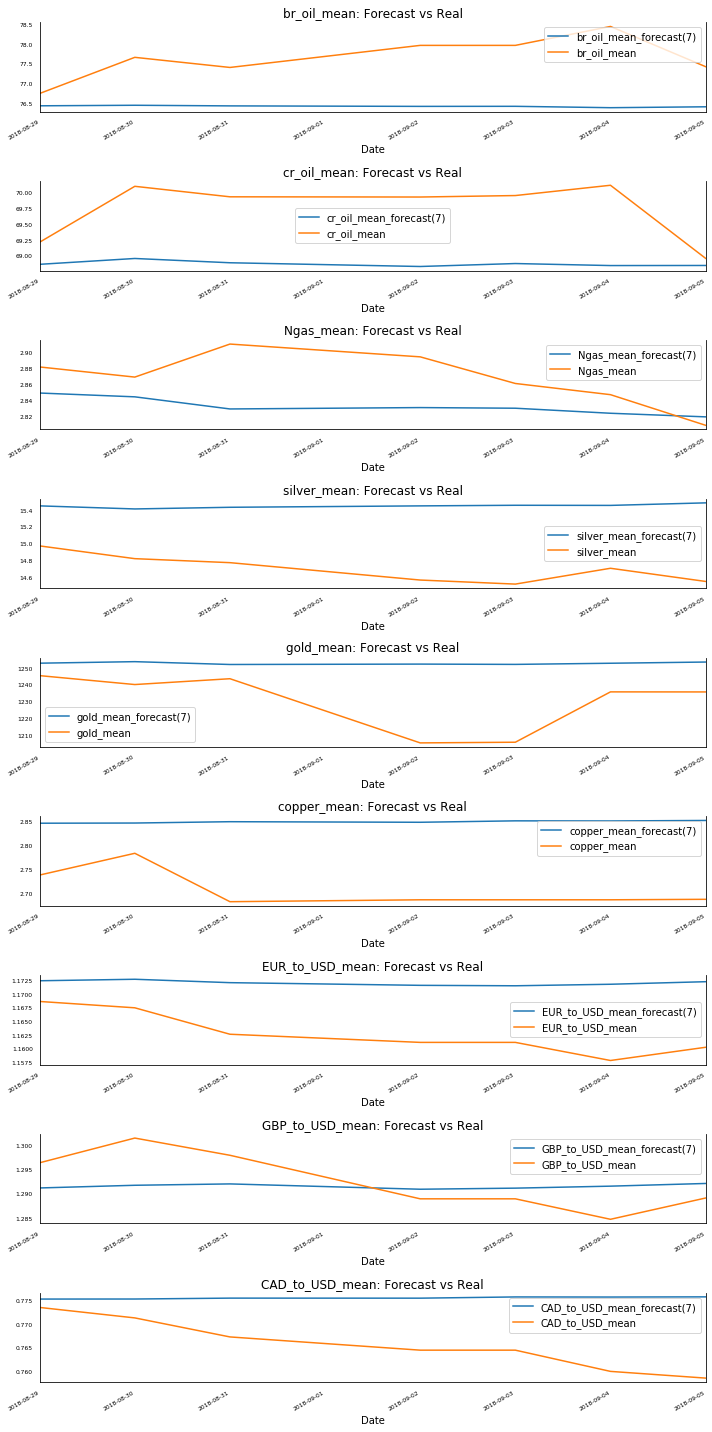

In [75]:
# visualize the forecast vs real
fig, axes = plt.subplots(nrows=int(len(df.columns)), ncols=1, figsize=(10,20))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast(7)'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-next_days:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Real")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();